### Modelling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [3]:
X_train = pd.read_csv(r'/Users/melodie.ezeani/Documents/loan_api_project/data/X_train_data.csv') 
X_test = pd.read_csv(r'/Users/melodie.ezeani/Documents/loan_api_project/data/X_test_data.csv') 
X_train_log = pd.read_csv(r'/Users/melodie.ezeani/Documents/loan_api_project/data/X_train_log_data.csv') 
X_test_log = pd.read_csv(r'/Users/melodie.ezeani/Documents/loan_api_project/data/X_test_log_data.csv') 
y_train = pd.read_csv(r'/Users/melodie.ezeani/Documents/loan_api_project/data/y_train_data.csv') 
y_test = pd.read_csv(r'/Users/melodie.ezeani/Documents/loan_api_project/data/y_test_data.csv') 

print("Files loaded successfully!")


Files loaded successfully!


### Baseline Model - Logistic Regression

In [4]:
X_train_log.head()

,emp_length_ft,address_state_ft,purpose_ft,grade_ft,sub_grade_ft,term_ 36 months,verification_status_Not Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,is_new_credit_user,annual_income:<25k,annual_income:25k-89k,annual_income:89k-153k,annual_income:153k-207k,annual_income:207k-260k,annual_income:260k-326k,int_rate:0.07-0.098,int_rate:0.098-0.14,int_rate:0.14-0.18,int_rate:0.18-0.22,int_rate:>0.22,dti:0.06-0.10,dti:0.10-0.16,dti:0.16-0.19,dti:0.19-0.24,dti:>0.24,loan_amount:4600-8k,loan_amount:8k-14k,loan_amount:14k-20k,loan_amount:20k-25k,loan_amount:25k-29k,loan_amount:>29k,payment_to_income_ratio_binned_PTI_Low,payment_to_income_ratio_binned_PTI_Medium,payment_to_income_ratio_binned_PTI_High,loan_to_income_ratio_binned_LTI_Low,loan_to_income_ratio_binned_LTI_Medium,loan_to_income_ratio_binned_LTI_High,residual_income_binned_ResInc_Low,residual_income_binned_ResInc_Medium,residual_income_binned_ResInc_High,interest_burden_ratio_binned_IntBur_Low,interest_burden_ratio_binned_IntBur_Medium,interest_burden_ratio_binned_IntBur_High
0,0,798,1195,1,4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,0,798,296,4,18,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
2,0,798,438,2,10,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,1,1443,3999,3,13,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
4,1,556,2260,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [5]:
X_train_log.corr()

,emp_length_ft,address_state_ft,purpose_ft,grade_ft,sub_grade_ft,term_ 36 months,verification_status_Not Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,is_new_credit_user,annual_income:<25k,annual_income:25k-89k,annual_income:89k-153k,annual_income:153k-207k,annual_income:207k-260k,annual_income:260k-326k,int_rate:0.07-0.098,int_rate:0.098-0.14,int_rate:0.14-0.18,int_rate:0.18-0.22,int_rate:>0.22,dti:0.06-0.10,dti:0.10-0.16,dti:0.16-0.19,dti:0.19-0.24,dti:>0.24,loan_amount:4600-8k,loan_amount:8k-14k,loan_amount:14k-20k,loan_amount:20k-25k,loan_amount:25k-29k,loan_amount:>29k,payment_to_income_ratio_binned_PTI_Low,payment_to_income_ratio_binned_PTI_Medium,payment_to_income_ratio_binned_PTI_High,loan_to_income_ratio_binned_LTI_Low,loan_to_income_ratio_binned_LTI_Medium,loan_to_income_ratio_binned_LTI_High,residual_income_binned_ResInc_Low,residual_income_binned_ResInc_Medium,residual_income_binned_ResInc_High,interest_burden_ratio_binned_IntBur_Low,interest_burden_ratio_binned_IntBur_Medium,interest_burden_ratio_binned_IntBur_High
emp_length_ft,1.000000,-0.025390,0.024891,0.002992,-0.000192,-0.098103,-0.051132,0.093116,0.218083,-0.006643,0.026194,-0.229707,-0.066735,-0.122702,-0.028177,0.090821,0.025101,0.016078,0.014466,-0.008767,-0.022742,-0.015139,0.040851,0.012428,-0.007042,0.001862,0.011997,0.017293,0.031460,-0.055471,-0.006626,0.057532,0.066372,0.033255,0.060220,0.026662,-0.011580,-0.015082,0.010342,-0.027124,0.016646,-0.164548,0.043892,0.120656,0.007156,-0.062964,0.055809
address_state_ft,-0.025390,1.000000,0.015503,0.012484,0.013225,0.033015,-0.021705,0.007218,-0.170475,0.005679,-0.021861,0.180986,0.005542,-0.013731,-0.029017,0.031364,0.021277,0.009986,0.006598,-0.014072,0.016989,0.010922,-0.006060,-0.004953,0.022174,0.001320,-0.012597,-0.026748,-0.029233,-0.001090,0.004040,0.009072,0.004727,-0.011210,0.002891,0.015803,-0.002870,-0.012933,0.019594,0.000183,-0.019885,-0.048615,0.005487,0.043128,-0.012663,0.023383,-0.010717
purpose_ft,0.024891,0.015503,1.000000,0.106551,0.109445,-0.052127,-0.060281,0.076545,-0.049291,0.000834,-0.019521,0.059571,-0.051443,-0.042765,0.062303,-0.028635,-0.020816,-0.020430,-0.011604,-0.081035,0.015677,0.059655,0.056710,0.014787,-0.028226,0.031154,0.041297,0.089007,0.038625,-0.076786,0.072037,0.111614,0.068967,0.020043,0.037371,-0.222818,0.042340,0.180478,-0.220075,0.046457,0.174970,0.009441,0.032732,-0.042173,-0.083819,0.020710,0.063135
grade_ft,0.002992,0.012484,0.106551,1.000000,0.979538,-0.432231,-0.171433,0.170445,-0.049573,-0.006287,-0.016967,0.058377,0.054796,-0.019312,-0.053472,0.045885,0.034280,0.027655,0.029538,-0.494921,-0.133442,0.543258,0.523894,0.196110,-0.038604,0.015714,0.037966,0.080619,-0.036684,-0.123266,-0.066330,0.105963,0.164245,0.062367,0.166753,-0.143495,-0.004616,0.148111,-0.156291,-0.014491,0.171604,-0.040055,-0.008835,0.048890,-0.612707,-0.039724,0.652626
sub_grade_ft,-0.000192,0.013225,0.109445,0.979538,1.000000,-0.443653,-0.177796,0.178426,-0.051181,-0.005887,-0.016426,0.059574,0.055545,-0.019662,-0.055446,0.047582,0.034636,0.030067,0.030583,-0.449880,-0.154163,0.551789,0.528470,0.199653,-0.040852,0.016420,0.040260,0.083297,-0.035346,-0.129406,-0.066831,0.114495,0.170759,0.063505,0.169397,-0.150154,-0.002140,0.152294,-0.164993,-0.014180,0.180043,-0.042718,-0.008692,0.051411,-0.615866,-0.045781,0.661844
term_ 36 months,-0.098103,0.033015,-0.052127,-0.432231,-0.443653,1.000000,0.242929,-0.212522,-0.102905,0.004864,0.013665,0.092157,0.025308,0.064741,0.013612,-0.043081,-0.019836,-0.013294,-0.005804,0.216865,0.056744,-0.186225,-0.316827,-0.108356,0.030572,-0.006980,-0.021234,-0.036207,-0.041138,0.158022,0.023394,-0.147294,-0.143528,-0.096791,-0.203827,0.058471,-0.037082,-0.021389,0.201666,0.035388,-0.238066,0.074785,-0.015019,-0.059766,0.307802,0.380146,-0.688064
verification_status_Not Verified,-0.051132,-0.021705,-0.060281,-0.171433,-0.177796,0.242929,1.000000,-0.594653,-0.050589,0.009289,0.0333

I will change y_test encoding for logistic regression, so that 1 is non-default and 0 is default.

This will help with interpretation:
- Positive coefficient → increases probability of class 1 (non-default/approval)
- Negative coefficient → increases probability of class 0 (default/rejection)

In [6]:
print(y_test['loan_default'].value_counts())


loan_default
0    6647
1    1066
Name: count, dtype: int64


In [ ]:
y_train_log = y_train.copy()
y_test_log = y_test.copy()

In [ ]:
y_train_log['loan_default'] = y_train_log['loan_default'].map({
    1: 0,
    0: 1
})

y_test_log['loan_default'] = y_test_log['loan_default'].map({
    1: 0,
    0: 1
})


In [15]:
print(y_train_log['loan_default'].value_counts())

loan_default
1    26583
0     4266
Name: count, dtype: int64


In [ ]:
print(y_test_log['loan_default'].value_counts())

loan_default
1    6647
0    1066
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

#### Build a Logistic Regression with regularization

In [48]:
reg = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', Cs=np.logspace(-4, 4, 20))



In [49]:
reg.fit(X_train_log, y_train_log)

LogisticRegressionCV(Cs=array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                     cv=5, penalty='l1', solver='liblinear')

In [50]:
feature_name = X_train_log.columns.values

In [51]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [52]:
summary_table

,Feature name,Coefficients
0,Intercept,2.059101
1,emp_length_ft,-0.090244
2,address_state_ft,-0.000038
3,purpose_ft,0.000008
4,grade_ft,0.000000
5,sub_grade_ft,-0.060073
6,term_ 36 months,0.497077
7,verification_status_Not Verified,-0.008607
8,verification_status_Verified,0.000000
9,home_ownership_MORTGAGE,0.000000


Text(0.5, 1.0, 'Top 10 Feature Coefficients')

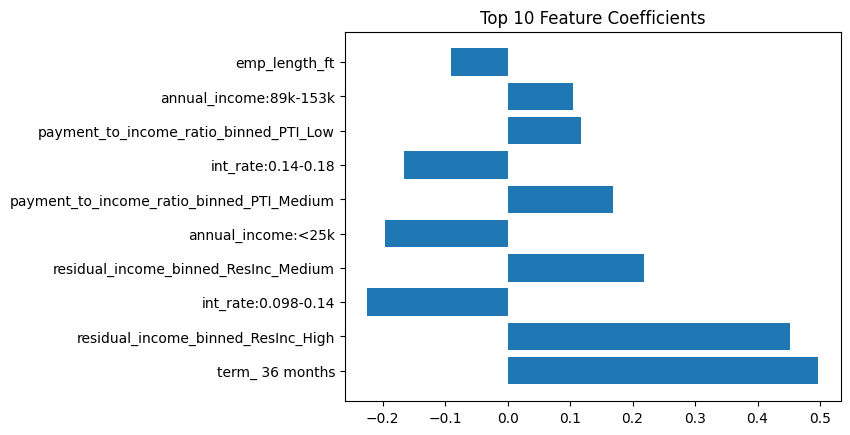

In [63]:
# Feature importance plot
coef_df = pd.DataFrame({
    'feature': X_train_log.columns,
    'coefficient': reg.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

plt.barh(coef_df['feature'][:10], coef_df['coefficient'][:10])
plt.title('Top 10 Feature Coefficients')


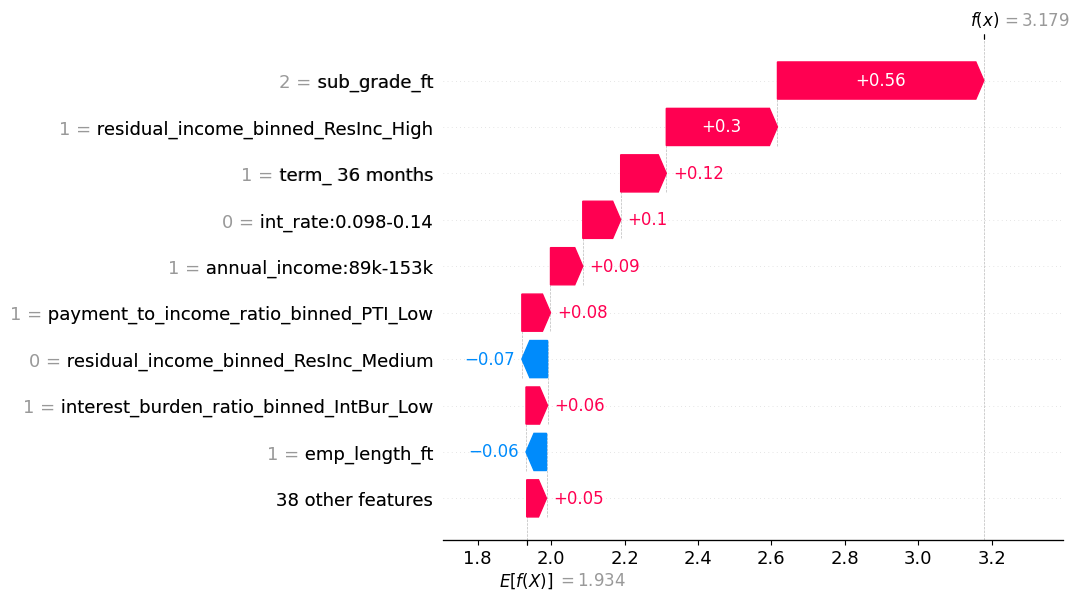

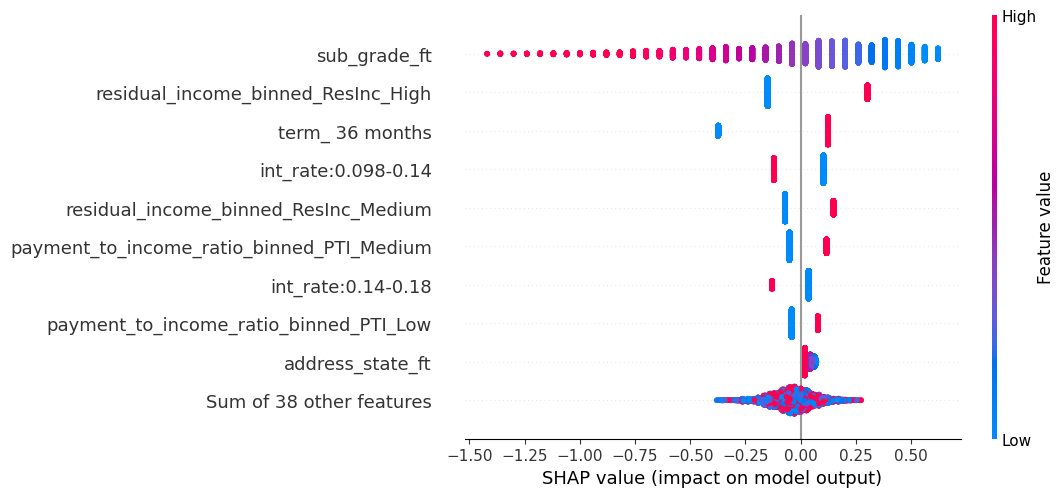

In [ ]:
explainer = shap.Explainer(reg, X_train_log)
shap_values = explainer(X_test_log)
shap.plots.waterfall(shap_values[0])  # Individual prediction
shap.plots.beeswarm(shap_values)      # Feature importance


Feature selection by removing features with 0 coefficients

In [53]:
selected_features = X_train_log.columns[reg.coef_[0] != 0]

In [54]:
X_train_log_2 = X_train_log[selected_features]

In [58]:
X_train_log_2.columns.values

array(['emp_length_ft', 'address_state_ft', 'purpose_ft', 'sub_grade_ft',
       'term_ 36 months', 'verification_status_Not Verified',
       'home_ownership_RENT', 'annual_income:<25k',
       'annual_income:25k-89k', 'annual_income:89k-153k',
       'int_rate:0.098-0.14', 'int_rate:0.14-0.18', 'dti:0.06-0.10',
       'dti:0.10-0.16', 'dti:0.16-0.19', 'loan_amount:8k-14k',
       'loan_amount:14k-20k', 'payment_to_income_ratio_binned_PTI_Low',
       'payment_to_income_ratio_binned_PTI_Medium',
       'loan_to_income_ratio_binned_LTI_Low',
       'loan_to_income_ratio_binned_LTI_Medium',
       'residual_income_binned_ResInc_Medium',
       'residual_income_binned_ResInc_High',
       'interest_burden_ratio_binned_IntBur_Low'], dtype=object)

In [59]:
X_train_log_2.shape

(30849, 24)

In [65]:
model = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', Cs=np.logspace(-4, 4, 20))



In [66]:
model.fit(X_train_log_2, y_train_log)

LogisticRegressionCV(Cs=array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                     cv=5, penalty='l1', solver='liblinear')

Model Validation

In [69]:
X_test_log_2 = X_test_log[selected_features]

In [70]:
pred = model.predict_proba(X_test_log_2)

In [72]:
pred = pred[:][:, 1]

In [73]:
y_test_temp = y_test

In [74]:
y_test_temp.reset_index(drop=True, inplace=True)

In [75]:
df_actual_predicted_probs = pd.concat([y_test_temp, pd.DataFrame(pred)], axis=1)

In [76]:
df_actual_predicted_probs.columns = ['y_test', 'pred_proba']

In [77]:
df_actual_predicted_probs.index = y_test.index

In [85]:
tr = 0.9
df_actual_predicted_probs['pred'] = np.where(df_actual_predicted_probs['pred_proba'] > tr, 1, 0)


In [86]:
pd.DataFrame(metrics.confusion_matrix(df_actual_predicted_probs['y_test'], df_actual_predicted_probs['pred']), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,3924,2723
Actual: True,861,205


### Random Forest Modelling

In [87]:
X_train.head()

,int_rate,loan_amount,emp_length_ft,address_state_ft,purpose_ft,grade_ft,sub_grade_ft,term_ 36 months,verification_status_Not Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,monthly_income,payment_to_income_ratio,loan_to_income_ratio,residual_income,is_new_credit_user,log_total_acc,interest_burden_ratio,annual_income:<25k,annual_income:25k-89k,annual_income:89k-153k,annual_income:153k-207k,annual_income:207k-260k,annual_income:260k-326k,int_rate:0.07-0.098,int_rate:0.098-0.14,int_rate:0.14-0.18,int_rate:0.18-0.22,int_rate:>0.22,dti:0.06-0.10,dti:0.10-0.16,dti:0.16-0.19,dti:0.19-0.24,dti:>0.24,loan_amount:4600-8k,loan_amount:8k-14k,loan_amount:14k-20k,loan_amount:20k-25k,loan_amount:25k-29k,loan_amount:>29k,payment_to_income_ratio_binned_PTI_Low,payment_to_income_ratio_binned_PTI_Medium,payment_to_income_ratio_binned_PTI_High,loan_to_income_ratio_binned_LTI_Low,loan_to_income_ratio_binned_LTI_Medium,loan_to_income_ratio_binned_LTI_High,residual_income_binned_ResInc_Low,residual_income_binned_ResInc_Medium,residual_income_binned_ResInc_High,interest_burden_ratio_binned_IntBur_Low,interest_burden_ratio_binned_IntBur_Medium,interest_burden_ratio_binned_IntBur_High
0,0.0729,6000,0,798,1195,1,4,1,0,0,0,0,0,1,5833.333333,0.031896,0.085714,5647.273333,0,2.484907,1.116360,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,0.1649,14300,0,798,296,4,18,0,0,1,0,0,0,1,7083.333333,0.049622,0.168235,6731.843333,0,3.091042,1.474783,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
2,0.1036,3250,0,798,438,2,10,1,0,0,0,0,0,1,1020.000000,0.103353,0.265523,914.580000,0,2.484907,1.167729,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,0.1316,2400,1,1443,3999,3,13,1,1,0,0,0,0,1,6000.000000,0.013508,0.033333,5918.950000,0,2.079442,1.215750,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
4,0.0542,2000,1,556,2260,1,1,1,1,0,1,0,0,0,5416.666667,0.011136,0.030769,5356.346667,0,3.555348,1.085760,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [88]:
X_train.columns

Index(['int_rate', 'loan_amount', 'emp_length_ft', 'address_state_ft',
       'purpose_ft', 'grade_ft', 'sub_grade_ft', 'term_ 36 months',
       'verification_status_Not Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OWN',
       'home_ownership_RENT', 'monthly_income', 'payment_to_income_ratio',
       'loan_to_income_ratio', 'residual_income', 'is_new_credit_user',
       'log_total_acc', 'interest_burden_ratio', 'annual_income:<25k',
       'annual_income:25k-89k', 'annual_income:89k-153k',
       'annual_income:153k-207k', 'annual_income:207k-260k',
       'annual_income:260k-326k', 'int_rate:0.07-0.098', 'int_rate:0.098-0.14',
       'int_rate:0.14-0.18', 'int_rate:0.18-0.22', 'int_rate:>0.22',
       'dti:0.06-0.10', 'dti:0.10-0.16', 'dti:0.16-0.19', 'dti:0.19-0.24',
       'dti:>0.24', 'loan_amount:4600-8k', 'loan_amount:8k-14k',
       'loan_amount:14k-20k', 'loan_amount:20k-25k', 'loan_amount:25k-29k',
     

In [89]:
cat_variables = ['emp_length_ft', 'address_state_ft', 'purpose_ft', 'grade_ft', 'sub_grade_ft',
       'term_ 36 months', 'verification_status_Not Verified',
       'verification_status_Verified', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OWN', 'home_ownership_RENT',
       'is_new_credit_user', 'annual_income:<25k', 'annual_income:25k-89k',
       'annual_income:89k-153k', 'annual_income:153k-207k',
       'annual_income:207k-260k', 'annual_income:260k-326k',
       'int_rate:0.07-0.098', 'int_rate:0.098-0.14', 'int_rate:0.14-0.18',
       'int_rate:0.18-0.22', 'int_rate:>0.22', 'dti:0.06-0.10',
       'dti:0.10-0.16', 'dti:0.16-0.19', 'dti:0.19-0.24', 'dti:>0.24',
       'loan_amount:4600-8k', 'loan_amount:8k-14k', 'loan_amount:14k-20k',
       'loan_amount:20k-25k', 'loan_amount:25k-29k', 'loan_amount:>29k',
       'payment_to_income_ratio_binned_PTI_Low',
       'payment_to_income_ratio_binned_PTI_Medium',
       'payment_to_income_ratio_binned_PTI_High',
       'loan_to_income_ratio_binned_LTI_Low',
       'loan_to_income_ratio_binned_LTI_Medium',
       'loan_to_income_ratio_binned_LTI_High',
       'residual_income_binned_ResInc_Low',
       'residual_income_binned_ResInc_Medium',
       'residual_income_binned_ResInc_High',
       'interest_burden_ratio_binned_IntBur_Low',
       'interest_burden_ratio_binned_IntBur_Medium',
       'interest_burden_ratio_binned_IntBur_High']

In [90]:
X_train1 = X_train[cat_variables]

In [97]:
X_test1 = X_test[cat_variables]

In [91]:
num_var = ['int_rate', 'loan_amount', 'emp_length_ft', 'address_state_ft',
       'purpose_ft', 'grade_ft', 'sub_grade_ft', 'term_ 36 months',
       'verification_status_Not Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OWN',
       'home_ownership_RENT', 'monthly_income', 'payment_to_income_ratio',
       'loan_to_income_ratio', 'residual_income', 'is_new_credit_user',
       'log_total_acc', 'interest_burden_ratio']

In [92]:
X_train2 = X_train[num_var]

In [98]:
X_test2 = X_test[num_var]

In [95]:
rf_model = RandomForestClassifier(max_depth = 7, random_state= 42, max_features = 3,
                               class_weight ='balanced', n_estimators=50)

In [96]:
rf_model.fit(X_train1, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=3,
                       n_estimators=50, random_state=42)

In [99]:
pred = rf_model.predict(X_test1)

In [101]:
pd.DataFrame(confusion_matrix(y_test, pred), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,3949,2698
Actual: True,361,705


In [102]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.59      0.72      6647
           1       0.21      0.66      0.32      1066

    accuracy                           0.60      7713
   macro avg       0.56      0.63      0.52      7713
weighted avg       0.82      0.60      0.66      7713



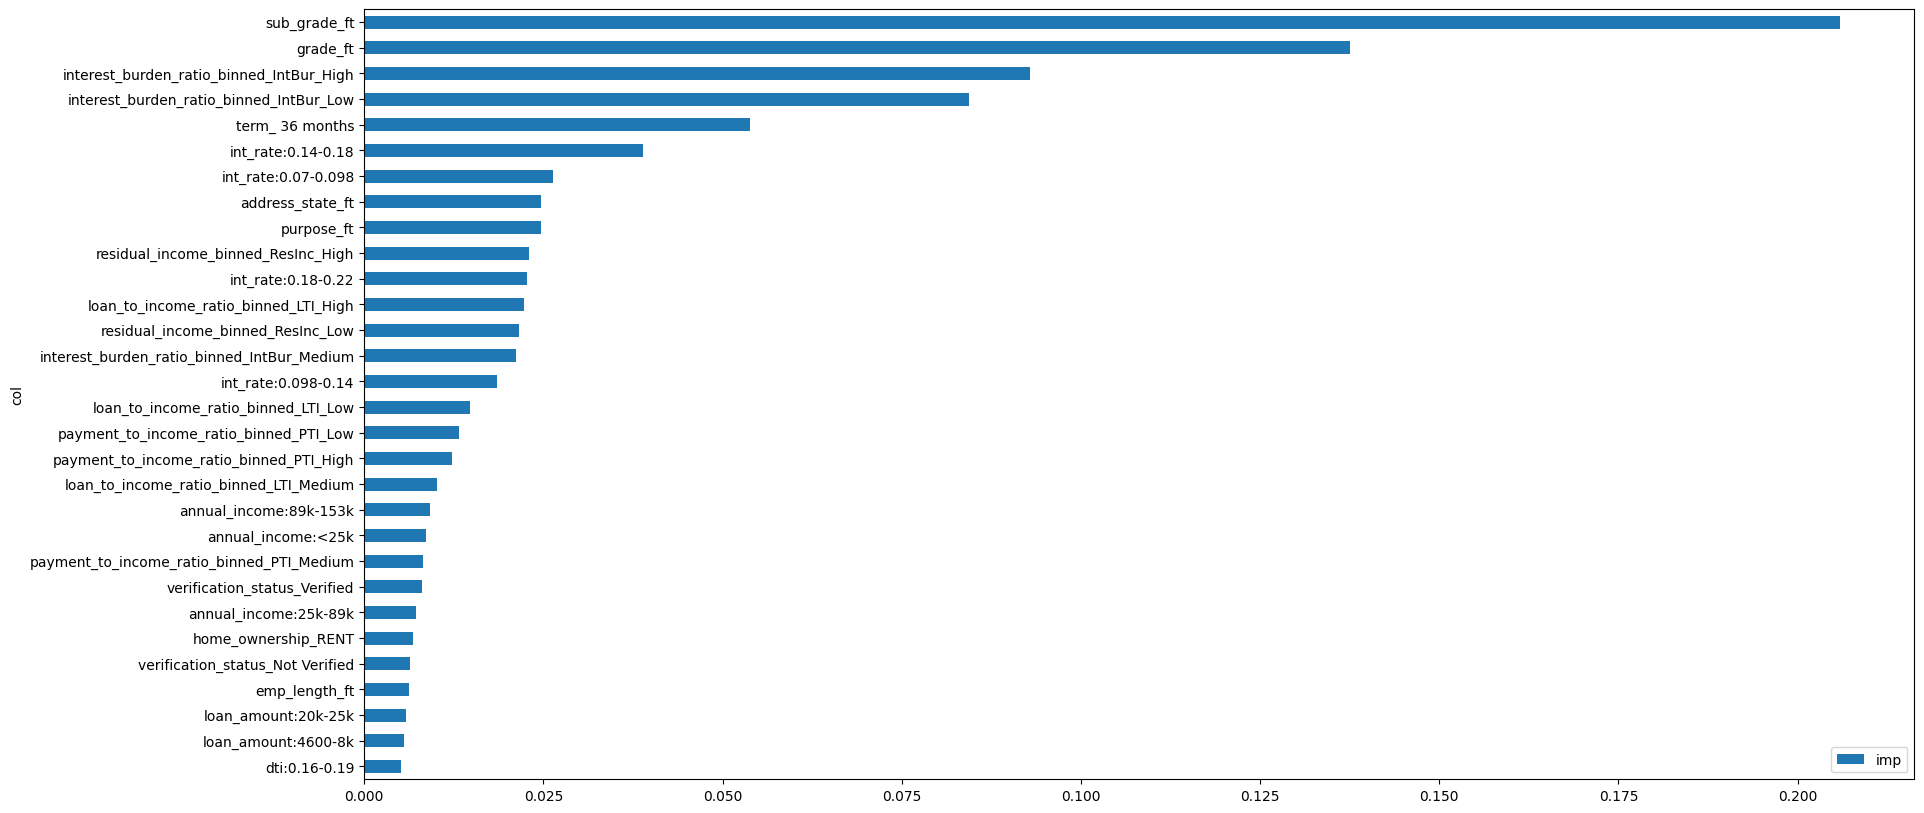

In [104]:
fea_imp = pd.DataFrame({'imp':rf_model.feature_importances_, 'col': X_train1.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))

In [106]:
# Get feature importances from trained random forest
importances = rf_model.feature_importances_
feature_names = X_train1.columns

# Create importance dataframe
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Select top N features
top_n = 15  # or however many you want
selected_features = importance_df.head(top_n)['feature'].tolist()

# Create new datasets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [107]:
rf_model_s = RandomForestClassifier(max_depth = 10, random_state= 42, max_features = 5,
                               class_weight ='balanced', n_estimators=100)

In [108]:
rf_model_s.fit(X_train_selected, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=5,
                       random_state=42)

In [109]:
pred_s = rf_model_s.predict(X_test_selected)

In [110]:
pd.DataFrame(confusion_matrix(y_test, pred_s), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,5392,1255
Actual: True,654,412


In [111]:
print(classification_report(y_test, pred_s))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      6647
           1       0.25      0.39      0.30      1066

    accuracy                           0.75      7713
   macro avg       0.57      0.60      0.58      7713
weighted avg       0.80      0.75      0.77      7713



data two

In [115]:
rfc_model = RandomForestClassifier(max_depth = 7, random_state= 42, max_features = 3,
                               class_weight ='balanced', n_estimators=50)

In [116]:
rfc_model.fit(X_train2, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=3,
                       n_estimators=50, random_state=42)

In [117]:
pred2 = rfc_model.predict(X_test2)

In [118]:
pd.DataFrame(confusion_matrix(y_test, pred2), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,4208,2439
Actual: True,393,673


In [119]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.91      0.63      0.75      6647
           1       0.22      0.63      0.32      1066

    accuracy                           0.63      7713
   macro avg       0.57      0.63      0.54      7713
weighted avg       0.82      0.63      0.69      7713



Generate best Parameters for data Model 1

In [112]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced'],
    'max_features': ['sqrt', 'log2', None]
}

# Create grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit and find best parameters
grid_search.fit(X_train1, y_train)

# Get best model
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Make predictions
y_pred = best_rf.predict(X_test1)
y_proba = best_rf.predict_proba(X_test1)[:, 1]


/Users/melodie.ezeani/Documents/loan_api_project/loan_env/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/melodie.ezeani/Documents/loan_api_project/loan_env/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/melodie.ezeani/Documents/loan_api_project/loan_env/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/melodie.ezeani/Documents/loan_api_project/loan_env/lib/pytho

Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.679990057648973


In [113]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index = ['Actual: False', 'Actual: True'],
             columns = ['Pred: False', 'Pred: True'])

,Pred: False,Pred: True
Actual: False,3751,2896
Actual: True,323,743


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.56      0.70      6647
           1       0.20      0.70      0.32      1066

    accuracy                           0.58      7713
   macro avg       0.56      0.63      0.51      7713
weighted avg       0.82      0.58      0.65      7713



In [ ]:
import pickle

# Save model
with open('best_rf.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

# Load model
with open('best_rf.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


##### Conclusion

I used logistic regression and random forest to train the model.

I didn't get great results using logistic regression because of how highly imbalanced the data is.
I will proceed with the random forest model gotten after hyper parameter tuning

In [129]:
# Save feature names for inference
with open('/Users/melodie.ezeani/Documents/loan_api_project/model/feature_names.pkl', 'wb') as f:
    pickle.dump(X_train1.columns.tolist(), f)
